In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns


def display_hist_stack(data, x, hue):
    ax = sns.histplot(data=data,
                      x=x,
                      hue=hue,
                      multiple='stack',
                      bins=10)

    total_heights = np.zeros(len(ax.patches))

    for i, bars in enumerate(ax.containers):
        for j, bar in enumerate(bars):
            height = bar.get_height()
            total_heights[j] += height

    for i, bars in enumerate(ax.containers):
        for j, bar in enumerate(bars):
            height = bar.get_height()
            if height > 0:
                percentage = (height / total_heights[j]) * 100
                ax.annotate(f'{percentage:.1f}%',
                            xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height),
                            xytext=(0, -3),  # 3 points vertical offset towards the bottom
                            textcoords="offset points",
                            ha='center', va='top', rotation=90)
                

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

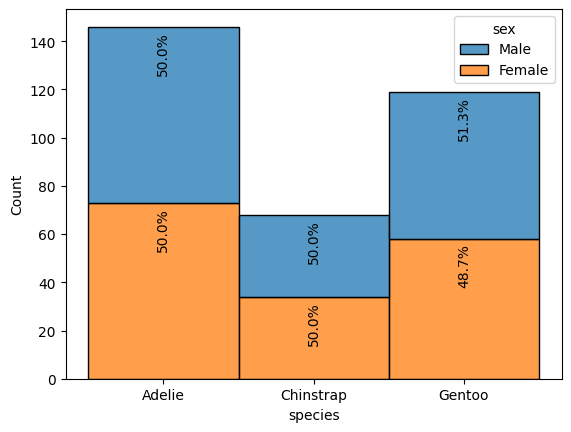

In [3]:


penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
display_hist_stack(data=penguins, x="species", hue="sex")